In [121]:
%matplotlib notebook
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from geopy.geocoders import Nominatim
import re
from folium.plugins import AntPath
import geopy
from geopy.distance import great_circle
from shapely.geometry import Point, LineString
import pyproj
import pycountry_convert as pc
from branca.element import Element

In [25]:
df = pd.read_hdf('/storage/group_storage/deepthought/researcher_migration/migration_dataset_with_countries_dropNA.h5')

In [30]:
def filter_groups(group):
    return group['country'].nunique() >= 2

filtered_groups = df.groupby('@path').filter(filter_groups)

In [31]:
grouped_filtered = filtered_groups.groupby('@path')
sampled_paths = grouped_filtered.groups.keys() if len(grouped_filtered.groups.keys()) < 50 else pd.Series(list(grouped_filtered.groups.keys())).sample(n=50, random_state=1).tolist()

final_df = df[df['@path'].isin(sampled_paths)]

In [36]:
unique_final = final_df.drop_duplicates(subset=['@path', 'country'])
sorted_df = unique_final.sort_values(by='@path')

In [37]:
sorted_df

,@path,title,abstract,author,aff,block,latitude,longitude,country,country_latitude,country_longitude
37273,/0000-0001-6139-6887,Modeling of fatigue behavior in relaxor piezoc...,The functional form of the time decay of the r...,"Zhang, Shujun","Materials Research Institute, Pennsylvania Sta...",s.zhang,40.801730,-77.860125,United States of America,45.705628,-112.599436
12709,/0000-0001-6139-6887,Growth kinetics of the metastable tetragonal p...,Mass-transport processes within the boundary l...,"Zhang, Shujun","Institute of Crystal Materials, Shandong Unive...",s.zhang,36.648930,117.029014,China,36.555067,103.883612
72690,/0000-0001-6191-3389,An acidic protein aligns magnetosomes along a ...,Magnetotactic bacteria are widespread aquatic ...,"Faivre, Damien","Max Planck Institute for Marine Microbiology, ...",d.faivre,53.109650,8.847570,Germany,51.133723,10.288485
50121,/0000-0001-6191-3389,Mineralogical and isotopic properties of inorg...,Inorganic magnetite nanocrystals were synthesi...,"Faivre, Damien","Laboratoire de Géochimie des Eaux, CNRS UMR 70...",d.faivre,48.844773,2.356462,France,42.460704,-2.876697
141602,/0000-0001-6414-6293,Climate fluctuations during the Holocene in NW...,High resolution benthic foraminiferal stable i...,"Pena, L. D.",Lamont-Doherty Earth Observatory of Columbia U...,l.pena,41.003566,-73.909053,United States of America,45.705628,-112.599436
...,...,...,...,...,...,...,...,...,...,...,...
81600,/0000-0003-3207-7021,Multithreading for synchronization tolerance i...,"Physical constraints such as power, leakage an...","Buttari, Alfredo","Computer Science Department, University of Ten...",a.buttari,35.954401,-83.929456,United States of America,45.705628,-112.599436
91394,/0000-0003-4099-8664,Nanocomposite field effect transistors based o...,The authors have examined the field effect beh...,"Toffanin, Stefano",Department of Chemistry and HKU-CAS Joint Labo...,s.toffanin,37.019355,-7.930440,Portugal,39.634050,-8.055766
63543,/0000-0003-4099-8664,CUORICINO status and CUORE prospects,"CUORE is a proposed experiment, already partia...","Toffanin, S.","Laboratori Nazionali di Legnaro, Legnaro (PD) ...",s.toffanin,45.352492,11.949370,Italy,42.751183,12.140788
42008,/0000-0003-4982-5487,Spin blockade in ferromagnetic nanocontacts,Using a free-electron model and a linear respo...,"Zhuravlev, M. Ye.",Department of Physics and Astronomy and Center...,m.zhuravlev,40.818253,-96.695225,United States of America,45.705628,-112.599436


In [45]:
unique_countries = sorted_df[['country', 'latitude', 'longitude']].drop_duplicates(subset=['country'])
country_coords = {row['country']: (row['latitude'], row['longitude']) for index, row in unique_countries.iterrows()}

In [48]:
max_frequency = migration_paths_df['frequency'].max()
min_thickness = 1 
max_thickness = 10 
scale_factor = (max_thickness - min_thickness) / max_frequency

In [40]:
paths = []
for path, group in sorted_df.groupby('@path'):
    countries = group['country'].unique() 
    for i in range(len(countries) - 1):
        paths.append({'@path': path, 'origin_country': countries[i], 'destination_country': countries[i+1]})


In [43]:
paths

[{'@path': '/0000-0001-6139-6887',
  'origin_country': 'United States of America',
  'destination_country': 'China'},
 {'@path': '/0000-0001-6191-3389',
  'origin_country': 'Germany',
  'destination_country': 'France'},
 {'@path': '/0000-0001-6414-6293',
  'origin_country': 'United States of America',
  'destination_country': 'Spain'},
 {'@path': '/0000-0001-6656-4237',
  'origin_country': 'Netherlands',
  'destination_country': 'Japan'},
 {'@path': '/0000-0001-7020-9297',
  'origin_country': 'Netherlands',
  'destination_country': 'United States of America'},
 {'@path': '/0000-0001-7175-4828',
  'origin_country': 'Germany',
  'destination_country': 'United States of America'},
 {'@path': '/0000-0001-7799-5614',
  'origin_country': 'Germany',
  'destination_country': 'Israel'},
 {'@path': '/0000-0001-7799-5614',
  'origin_country': 'Israel',
  'destination_country': 'Austria'},
 {'@path': '/0000-0001-9036-9263',
  'origin_country': 'Australia',
  'destination_country': 'United States o

In [41]:
paths_df = pd.DataFrame(paths)
migration_paths_df = paths_df.groupby(['origin_country', 'destination_country']).size().reset_index(name='frequency')


In [38]:
m = folium.Map(location=[20, 0], zoom_start=2)

In [47]:
migration_paths_df

,origin_country,destination_country,frequency
0,Australia,China,1
1,Australia,United States of America,1
2,Austria,Canada,1
3,Canada,Germany,1
4,Dominican Rep.,Argentina,1
5,Finland,United Kingdom,1
6,France,Germany,1
7,France,United States of America,2
8,Germany,France,3
9,Germany,Hungary,1


In [49]:
for index, row in migration_paths_df.iterrows():

    origin_coords = country_coords[row['origin_country']]
    destination_coords = country_coords[row['destination_country']]
    line_thickness = row['frequency'] * scale_factor
    folium.PolyLine(locations=[origin_coords, destination_coords], weight=line_thickness).add_to(m)


In [50]:
m

In [52]:
m2 = folium.Map(location=[20, 0], zoom_start=2)


In [53]:
for index, row in migration_paths_df.iterrows():
    origin_coords = country_coords[row['origin_country']]
    destination_coords = country_coords[row['destination_country']]
    line_thickness = row['frequency'] * scale_factor
    ant_path = AntPath(locations=[origin_coords, destination_coords],
                       weight=line_thickness,
                       dash_array=[5, 20],
                       delay=1000,
                       color='blue',
                       pulse_color='lightblue')

    ant_path.add_to(m2)

In [54]:
m2

-----

In [65]:
def create_geodesic_line(origin, destination):

    geod = pyproj.Geod(ellps="WGS84")
    lonlats = geod.npts(origin[1], origin[0], destination[1], destination[0], 10) 
    lonlats = [origin[::-1]] + lonlats + [destination[::-1]]
    line = LineString(lonlats)
    return line

In [68]:
gdf = gpd.GeoDataFrame(columns=["geometry"])
geometries = []

In [69]:
for index, row in migration_paths_df.iterrows():
    origin = country_coords[row['origin_country']]
    destination = country_coords[row['destination_country']]
    line = create_geodesic_line(origin, destination)
    geometries.append(line)

In [70]:
gdf = gpd.GeoDataFrame(geometry=geometries)

/tmp/ipykernel_3307946/1055994220.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<IPython.core.display.Javascript object>


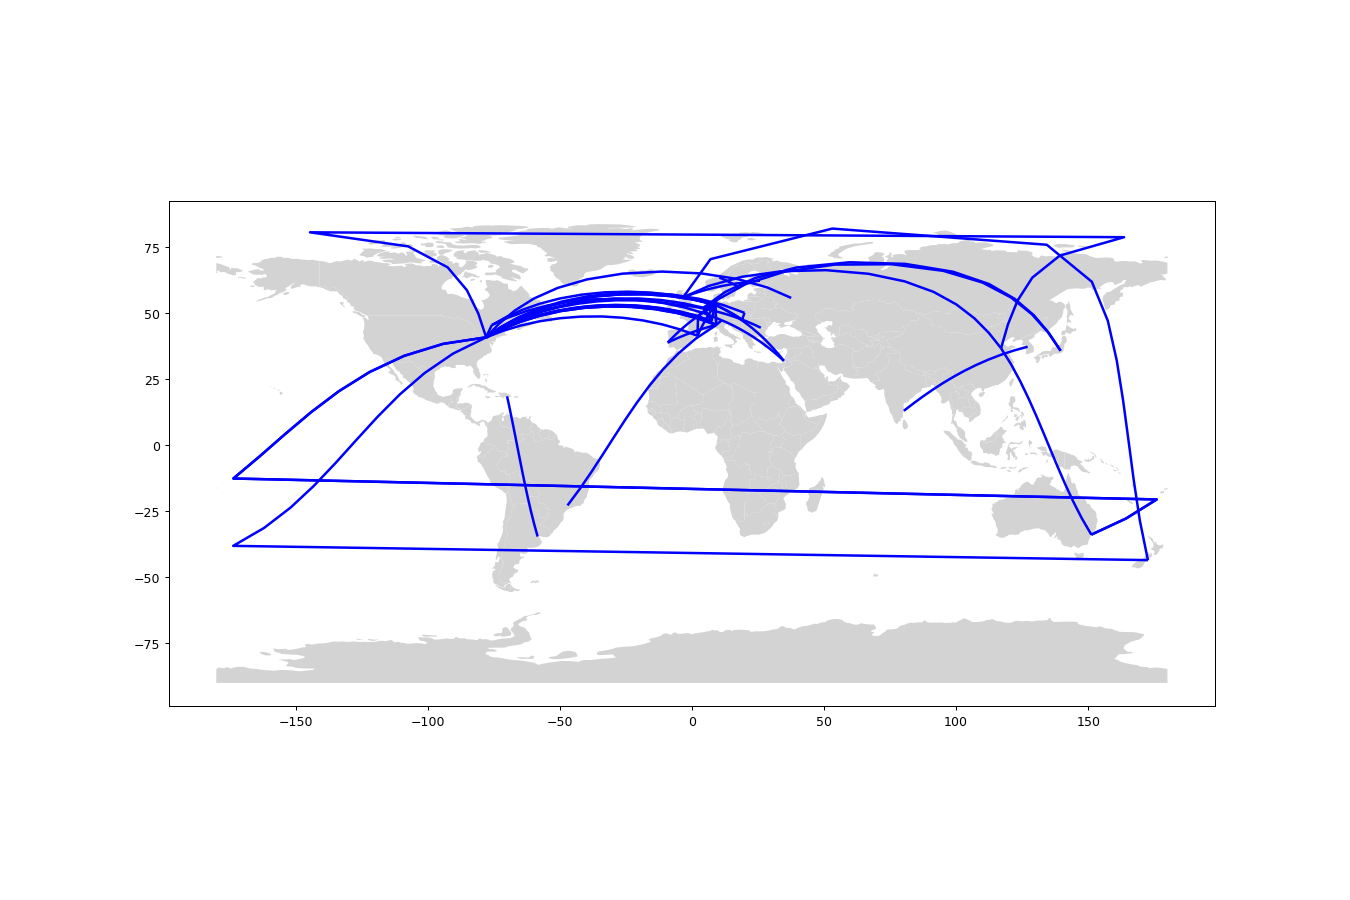

In [71]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, facecolor='lightgray')
gdf.plot(ax=ax, linewidth=2, color='blue')
plt.show()

In [75]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return None

In [76]:
migration_paths_df['origin_continent'] = migration_paths_df['origin_country'].apply(country_to_continent)
migration_paths_df['destination_continent'] = migration_paths_df['destination_country'].apply(country_to_continent)
continent_migration_paths = migration_paths_df.groupby(['origin_continent', 'destination_continent']).agg({'frequency': 'sum'}).reset_index()


/home/bumblebealu/.conda/envs/deepthought/lib/python3.9/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/home/bumblebealu/.conda/envs/deepthought/lib/python3.9/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


In [80]:
continent_points = {
    'Asia': (34.0479, 100.6197),
    'Europe': (54.5260, 15.2551),
    'Africa': (8.7832, 34.5085),
    'North America': (54.5260, -105.2551),
    'South America': (-8.7832, -55.4915),
    'Australia': (-25.2744, 133.7751),
    'Antarctica': (-82.8628, 135.0000),
    'Oceania': (-25.2744, 133.7751)
}

In [78]:
m3 = folium.Map(location=[20, 0], zoom_start=2)

In [87]:
for index, row in continent_migration_paths.iterrows():
    origin_point = continent_points[row['origin_continent']]
    destination_point = continent_points[row['destination_continent']]
    line_thickness = row['frequency']
    folium.PolyLine(locations=[origin_point, destination_point], weight=line_thickness).add_to(m3)


In [88]:
m3

In [130]:
m4 = folium.Map(location=[20, 0], zoom_start=2)

In [131]:
max_frequency = continent_migration_paths['frequency'].max()
continent_migration_paths['normalized_frequency'] = continent_migration_paths['frequency'] / max_frequency

In [132]:
def frequency_color(normalized_frequency):
    green_intensity = 100 + int((1 - normalized_frequency) * 155)
    return f'rgb(255, {green_intensity}, 0)'

In [133]:
for index, row in continent_migration_paths.iterrows():
    origin_point = continent_points[row['origin_continent']]
    destination_point = continent_points[row['destination_continent']]
    line_color = frequency_color(row['normalized_frequency'])
    folium.PolyLine(locations=[origin_point, destination_point], color=line_color, weight=5).add_to(m4)

In [136]:
legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 200px; height: 120px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color: white;
     opacity: 0.8; padding: 10px">
     &nbsp;<b>Migration Frequency</b><br>
     &nbsp;<i style="background:rgb(255,155,0);opacity:0.7">&nbsp;&nbsp;&nbsp;</i>&nbsp;High Frequency<br>
     &nbsp;<i style="background:rgb(255,205,0);opacity:0.7">&nbsp;&nbsp;&nbsp;</i>&nbsp;Medium Frequency<br>
     &nbsp;<i style="background:rgb(255,255,0);opacity:0.7">&nbsp;&nbsp;&nbsp;</i>&nbsp;Low Frequency<br>
</div>
'''

legend_element = Element(legend_html)
m4.get_root().html.add_child(legend_element)


In [137]:
m4